# Set up Python Environment

In [ ]:
!pip install gpflow==2.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 445 kB 8.1 MB/s 
     |████████████████████████████████| 107 kB 47.0 MB/s 


In [ ]:
import numpy as np
import tensorflow as tf
import gpflow
from matplotlib import pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

/usr/local/lib/python3.7/dist-packages/gpflow/experimental/utils.py:43: UserWarning: You're calling gpflow.experimental.check_shapes.decorator.check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  f"You're calling {name} which is considered *experimental*."
/usr/local/lib/python3.7/dist-packages/gpflow/experimental/utils.py:43: UserWarning: You're calling gpflow.experimental.check_shapes.inheritance.inherit_check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  f"You're calling {name} which is considered *experimental*."


# Intro to Gaussian Processes

**What is a Gaussian Proccess?** \
A collection of Gaussian distributions over some domain as the input.

This domain could be:

*   the Real Numberline (&#8477;), 
*   a Real Number space \(&#8477;<sup>N</sup>),
*   a discrete index, 
*   or some non-ordinal space (for example the color of a pigment or some category). 




**Ok, but what does a Gaussian Process do?** \
A Gaussian Process relates similarity between inputs to their outputs. \
This similarity (or more formally the co-variance) is defined by a kernel function. \

In the same way that a Gaussian distribution is defined by the mean and variance, a Gaussian Process is defined by the mean fuction and co-variance function. \

The mean function depends on the global value of the input x. (Think of something like *x*<sup>2</sup>). \
Whereas, the covariance function only depends on the similary between inputs (say *x* and *x'*).

**Why use a Gaussian Process?**

Based on the measurements we've taken, we can infer the value at the function at new locations.
Because of the kernel fuction these predictions are based on how similar the new locations are to the locations where we've taken measurements. 

Since the GP is a collection of Gaussian distributions, we can calculate how likely data is given the model. We can use that information to find how likely the model is given the data.

This is a form of Bayesian Inference:
$P(model|data) = \frac{P(data|model)P(model)}{P(data)}$

**OK, but what does that do for us?** \
We can use GP's to interpolate and extrapolate from the measurements we've taken - with uncertainty! 

We can encode physics into the kernel to make accurate predictions.

We can propagate uncertainties from measurements to the predicitons. 

This lets us answer questions like: 


*   What can we conclude from these measurements?
*   Where are we likely to find the optimum of a fuction?
*   What regions of the input space are we uncertain about?



# Kernels!

Let's take a look at some kernel functions and see what they mean.

In [ ]:
x = np.linspace(0,100,101)
print(x)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100.]


## Radial Basis Function:

$ K(x,x') = \sigma^2 \exp(-\frac{||x - x'||^2}{2l^2})$ 

$\sigma^2$ is the variance.

$l$ is the lengthscale.

Implications: 
*   The closer two inputs are the more similar their outputs should be. 
*   The output function is infinately differentiable with respect to the input.
> *   (The output function is "smooth")



/usr/local/lib/python3.7/dist-packages/gpflow/experimental/utils.py:43: UserWarning: You're calling gpflow.experimental.check_shapes.checker.ShapeChecker.__init__ which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  f"You're calling {name} which is considered *experimental*."


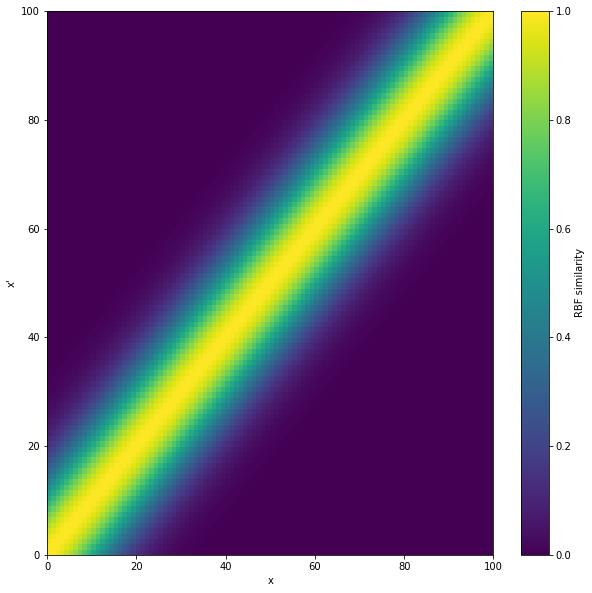

In [ ]:
#Define the Kernel
K = gpflow.kernels.SquaredExponential( variance = 1.0, lengthscales=10.0)

#Turn the input from np.array to tf.tensor
x_test = tf.convert_to_tensor(x.reshape(-1,1))

#Now evaluate K(x,x')
K_test = K.K(x_test, x_test)

#Plot K(x,x')
plt.figure(figsize=(10,10))
plt.pcolormesh(np.array(x_test).reshape(-1), 
               np.array(x_test).reshape(-1).T, 
               np.array(K_test))
plt.xlabel("x")
plt.ylabel("x'")
plt.colorbar(label = "RBF similarity")

plt.show()

Now, let's define a GP with this kernel and see what it looks like.

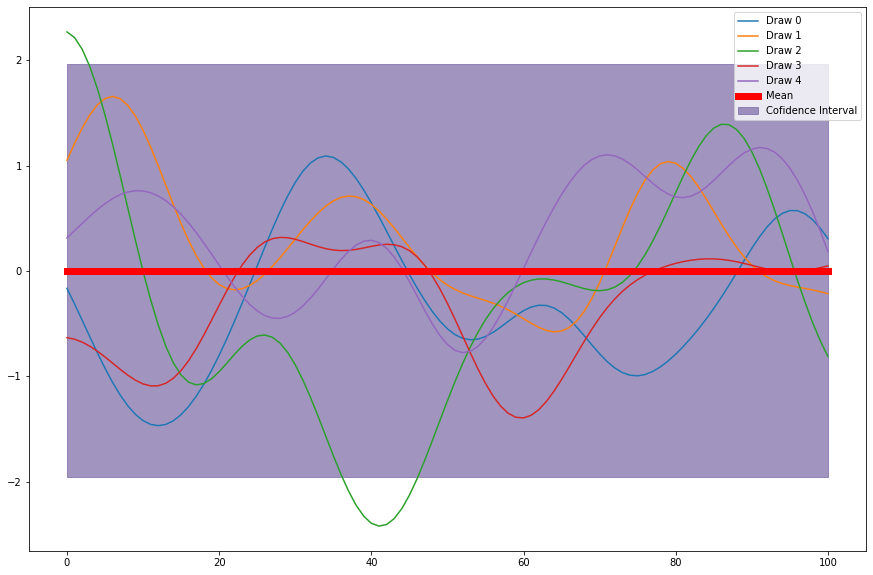

In [ ]:
mean = tf.zeros_like(x_test)

Y = np.random.multivariate_normal(np.array(mean).flatten(),
                                  np.array(K_test),
                                  size = 5)

plt.figure(figsize=(15,10))
for j in range(Y.shape[0]):
  plt.plot(np.array(x_test),
           Y[j,:], label = f'Draw {j}')
plt.fill_between(np.array(x_test).reshape(-1), 
                 np.array(mean+1.96*1).reshape(-1), 
                 np.array(mean-1.96*1).reshape(-1), 
                 alpha=0.7, color="#7A68A6", label = 'Cofidence Interval')
plt.plot(np.array(x_test), np.array(mean), 'r-', linewidth=7.0, label = 'Mean')
plt.legend() 
plt.show()

## Let's play with the parameters of this kernel

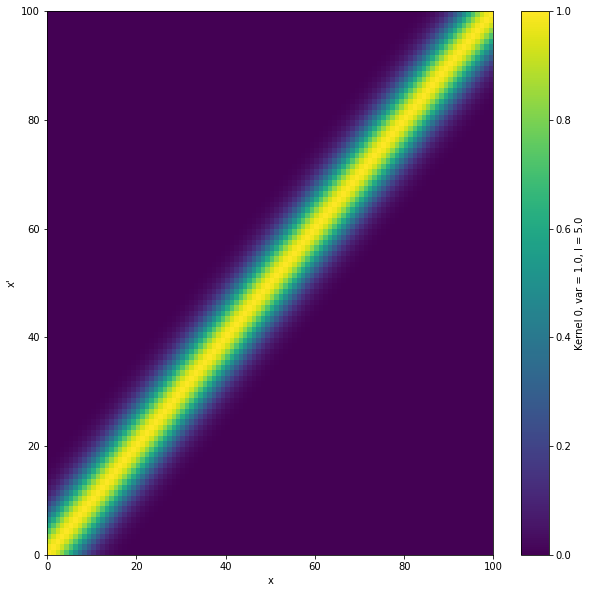

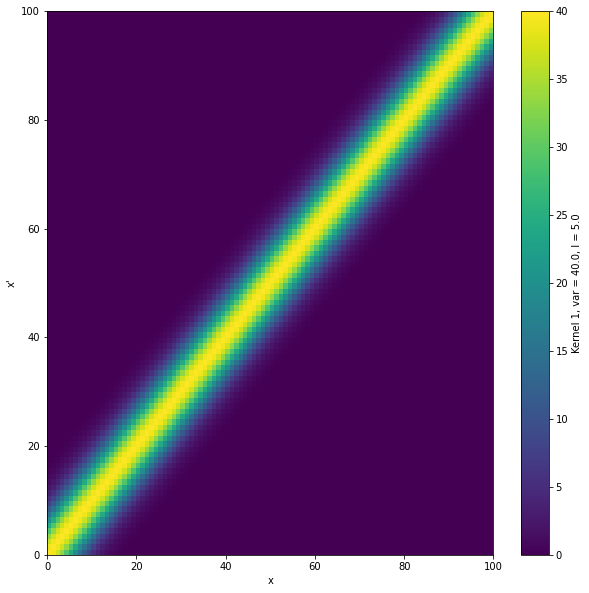

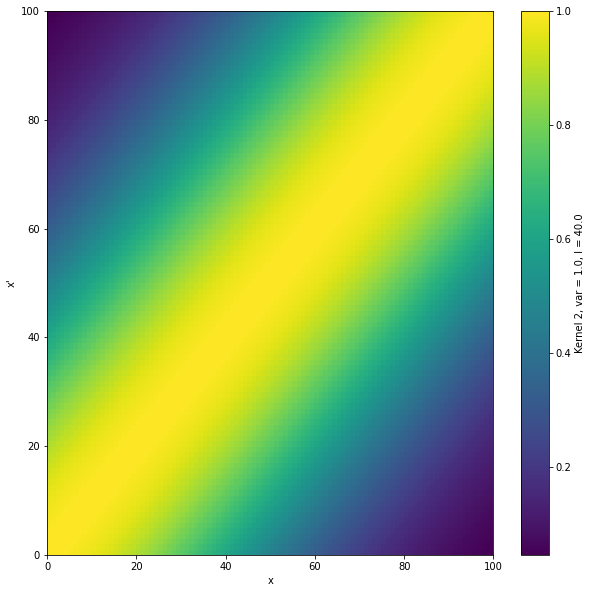

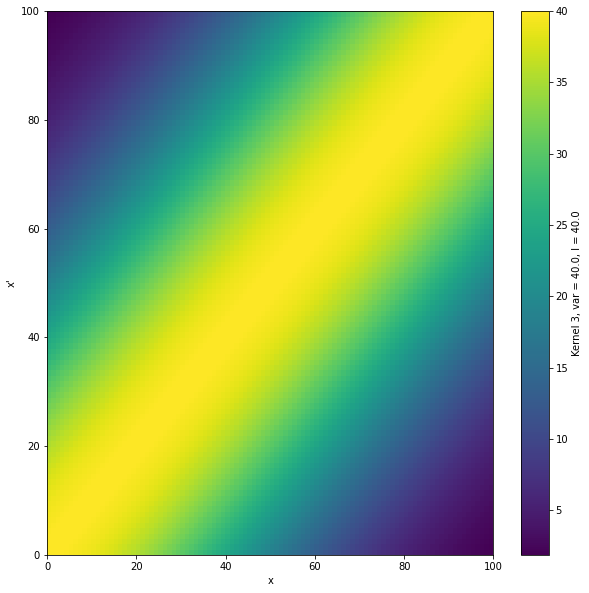

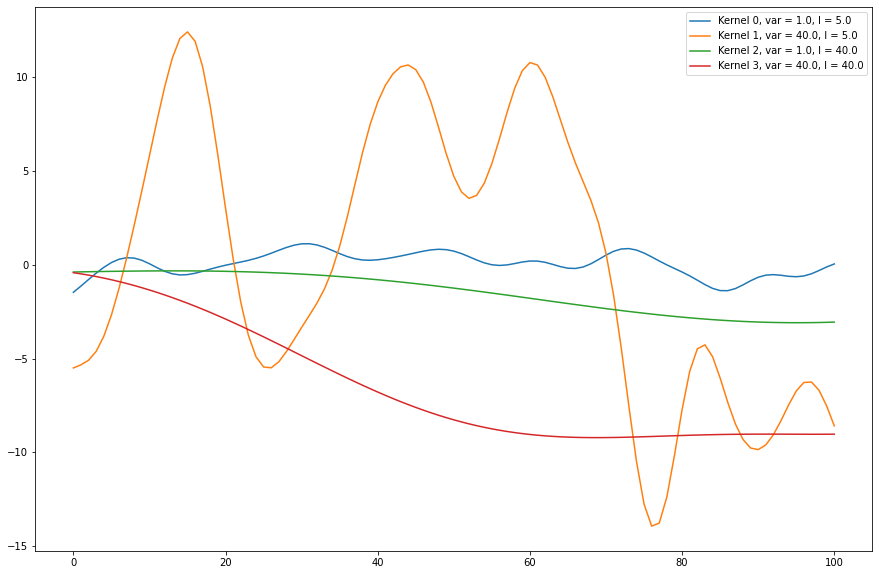

In [ ]:
variances = [1.0, 40.0, 1.0, 40.0]
lengthscales = [5.0, 5.0, 40.0, 40.0]

K0 = gpflow.kernels.SquaredExponential( variance = variances[0], lengthscales=lengthscales[0])
K1 = gpflow.kernels.SquaredExponential( variance = variances[1], lengthscales=lengthscales[1])
K2 = gpflow.kernels.SquaredExponential( variance = variances[2], lengthscales=lengthscales[2])
K3 = gpflow.kernels.SquaredExponential( variance = variances[3], lengthscales=lengthscales[3])
mean = tf.zeros_like(x_test)

K_s = [K0, K1, K2, K3]

K_tests = []
Y_s = []


for i,k in enumerate(K_s):
  K_test = k.K(x_test,x_test)
  K_tests.append(K_test)
  Y = np.random.multivariate_normal(np.array(mean).flatten(),
                                  np.array(K_test),
                                  size = 1)
  Y_s.append(Y)
  plt.figure(figsize=(10,10))
  plt.pcolormesh(np.array(x_test).reshape(-1), 
                 np.array(x_test).reshape(-1).T, 
                 np.array(K_tests[i]))
  plt.xlabel("x")
  plt.ylabel("x'")
  plt.colorbar(label = f"Kernel {i}, var = {variances[i]}, l = {lengthscales[i]}")


plt.figure(figsize=(15,10))
for i,y in enumerate(Y_s):
  plt.plot(np.array(x_test).reshape(-1),
           y.reshape(-1), 
           label = f"Kernel {i}, var = {variances[i]}, l = {lengthscales[i]}")
plt.legend() 
plt.show()
               

## Survey of Kernels



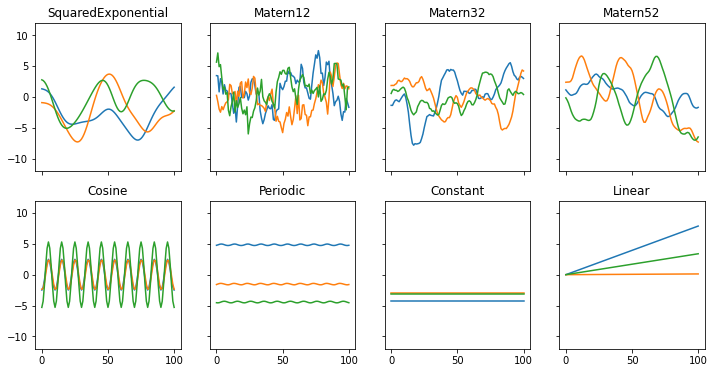

In [ ]:
def plotkernelsample(k, ax, x):
    K = k.K(x,x)
    ax.plot(x, np.random.multivariate_normal(np.zeros_like(np.array(x).flatten()), K, 3).T)
    ax.set_title(k.__class__.__name__)

f, axes = plt.subplots(2, 4, figsize=(12, 6), sharex=True, sharey=True)
plotkernelsample(gpflow.kernels.RBF(variance = 10, lengthscales = 10), axes[0,0], x_test)
plotkernelsample(gpflow.kernels.Matern12(variance = 10, lengthscales=10), axes[0,1], x_test)
plotkernelsample(gpflow.kernels.Matern32(variance = 10, lengthscales=10), axes[0,2], x_test)
plotkernelsample(gpflow.kernels.Matern52(variance = 10, lengthscales=10), axes[0,3], x_test)
plotkernelsample(gpflow.kernels.Cosine(variance = 10, lengthscales= 10), axes[1,0], x_test)
plotkernelsample(gpflow.kernels.Periodic(gpflow.kernels.RBF(variance=10, lengthscales=10), 
                                         period = 10), axes[1,1], x_test)
plotkernelsample(gpflow.kernels.Constant(variance = 10), axes[1,2], x_test)
plotkernelsample(gpflow.kernels.Linear(variance = 0.001), axes[1,3], x_test)


axes[0,0].set_ylim(-12, 12)
plt.show()

Implications:

**Matern $\frac{1}{2}$**
 
$K(x,x') = \sigma^2 \exp(-\frac{||x - x'||}{l})$

Depdends on the distance between x and x'.

Not-differentialble -- You expect discontinuous jumps in the function.

**Matern $\frac{3}{2}$**
 
$K(x,x') = \sigma^2 (1+\sqrt{3}\frac{||x - x'||}{l}) \exp(-\sqrt{3}\frac{||x - x'||}{l})$

Depdends on the distance between x and x'.
 
Singly differentialble -- You expect discontinuous jumps in the derivative
 of the function.

**Matern $\frac{5}{2}$**
 
$K(x,x') = \sigma^2 (1+\sqrt{5}\frac{||x - x'||}{l}+\frac{5}{3}\frac{||x - x'||^2}{l^2} )\exp(-\sqrt{3}\frac{||x - x'||}{l})$

Depdends on the distance between x and x'.
 
Doubly differentialble -- You expect discontinuous jumps in the 2nd derivative
 of the function.

**Cosine**

$K(x,x') = \sigma^2 \cos(2 \pi \frac{||x - x'||}{l})$

Depends on the distance between x and x'.

Function can be purely discribed by a cosine. 

**Periodic**

Transforms other kernels to be periodic. Using the RBF kernel as a base this is:

$K(x,x') = \sigma^2 \exp(-0.5 \sin^2(\pi \frac{||x - x'||}{\gamma} \frac{1}{l^2})$

Depends on the distance between x and x'. 

There is a periodic nature to the function that is not just pure sines or cosines. 

**Constant**

$K(x,x') = \sigma^2$

Your function is constant.

**Linear**

$K(x,x') = \sigma^2 xx'$

Your function is f(x) = c*x. 
Linear regression the hard way. 

**Other**

$K(x,x')$ can be any function that produces a positive semi-definate *n*⨯*n* matrix.

## Combining Kernels

Kernels can be combined to form a composite kernel. 

The Sum of two kernels is analogous to an OR operator: if the inputs are similar by kernel 1 OR by kernel 2 then the outputs should be similar.

The Product of two kernels is analogous to an AND operator: if the inputs are similar by kernel 1 AND by kernel 2 then the outputs should be similar.

Aside: Differentiation is a linear operator, so the derivative of a kernel is a valid kernel. This can be used to handel simulatneous observations of the function and it's derivative. 

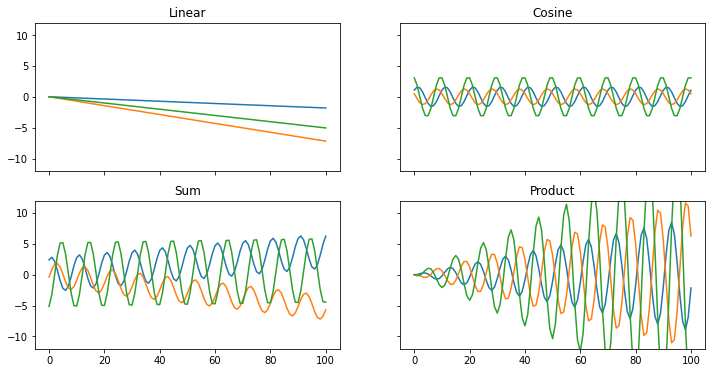

In [ ]:
k1 = gpflow.kernels.Linear(variance = 0.001)
k2 = gpflow.kernels.Cosine(variance = 10, lengthscales= 10)

k_sum = k1 + k2
k_product = k1 * k2

f, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True, sharey=True)
plotkernelsample(k1, axes[0,0], x_test)
plotkernelsample(k2, axes[0,1], x_test)
plotkernelsample(k_sum, axes[1,0], x_test)
plotkernelsample(k_product, axes[1,1], x_test)
axes[0,0].set_ylim(-12, 12)
plt.show()

# Regession

Now we have some data at locations $\mathbf{X}$ with observations $\mathbf{y}$.

We propose that there is some function $f(\mathbf{X}) = \mathbf{y}$, and we want to approximate that function with a Gaussian Process. We'll cal that appoximation $f^{*} \sim \mathcal{GP}(\mathbf{m},\mathbf{C})$, where $f^*$ is drawn from a Gaussian Process $\mathcal{GP}$ with mean $\mathbf{m}$ and covariance $\mathbf{C}$. 

We want to use $f^*$ to predict $f$ at new locations $\mathbf{X^*}$.
In machine learning parlance, $\mathbf{X}$ and $\mathbf{y}$ are the training set, and $\mathbf{X^*}$ is the test locations.

To do that we'll have to choose some kernel function $K(x,x')$ and evalutate:

$\mathbf{K}_{xx} =K(\mathbf{X}, \mathbf{X})$ $←$ Similarity of each measured location to each measured location.

$\mathbf{K}_{*x} =K(\mathbf{X^*}, \mathbf{X})$ $←$ Similarity of each new location to each measured location.

$\mathbf{K}_{**} =K(\mathbf{X^*}, \mathbf{X^*})$ $←$ Similarity of each new location to each new location.

Now we can find the mean and covariance of the Gaussian Process with respect to the data we have using:

$\mathbf{m} = \mathbf{K}_{*x} (\mathbf{K}_{xx}+ \sigma^{2}\mathbf{I})^{-1}\mathbf{y} $

$\mathbf{C} = \mathbf{K}_{**} -\mathbf{K}_{*x}(\mathbf{K}_{xx}+ \sigma^{2}\mathbf{I})^{-1}\mathbf{K}_{*x}^{T}$

where $\mathbf{I}$ is the identity matrix, and $\sigma^2$ is the likelihood variance.

Recall that a Gaussian process is a collection of Gaussian distributions. So, $\sigma^2$ is the minimum variance of those distributions at every location $x$ from either { $\mathbf{X}, \mathbf{X^*}$}. This sets the minimum "width" in the $\mathbf{y}$ direction at every location in the domain. We can specify this variance if we know something about the underlying function, or we can try to learn it from the data.  


## Generate Data that we will try to learn

In [ ]:
#Set up a function that gives us some property from a 1D input
def ground_truth_function(x):
    y =    np.sin(np.pi*x/50)\
        +3*np.sin(np.pi*x/100)\
        +1*np.sin(np.pi*(x+3)/10)
    return y

In [ ]:
#Set up the Domain (i.e. inputs)
x_ground_truth = np.linspace(0,100,1001)

#Calcualte the Ground Truth
y_ground_truth = ground_truth_function(x_ground_truth)    

## Let's see what that function looks like

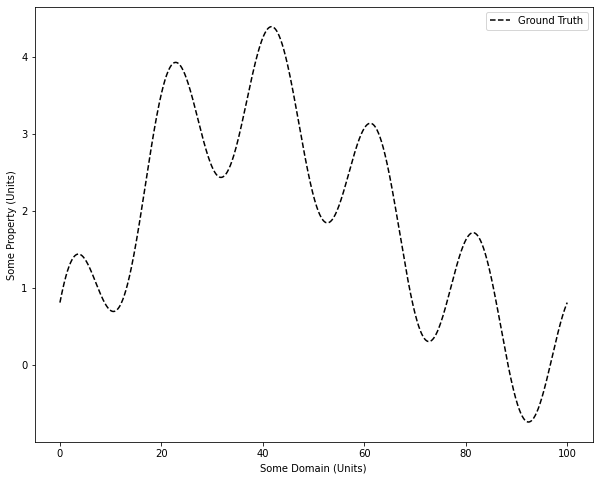

In [ ]:
#plot that function
plt.figure(figsize = (10,8))
plt.plot(x_ground_truth,y_ground_truth, "k--", label = "Ground Truth")
plt.xlabel("Some Domain (Units)")
plt.ylabel("Some Property (Units)")
plt.legend()
plt.show()

## Set up measurements of the property:

We'll define a function that will simulate taking a measurement. This measurement will include not only the value of the function, but also an estimate of the measurement uncertainty.

In [ ]:
def measure(x, std_noise = 0.25):
    #Find the ground truth, and add Gaussian noise (defined by mean and std)
    y = ground_truth_function(x) + np.random.normal(loc= 0, scale = std_noise, size = x.shape) 
    
    #Find the uncertainty in the measurement
    y_uncertainty = std_noise
    return y, y_uncertainty

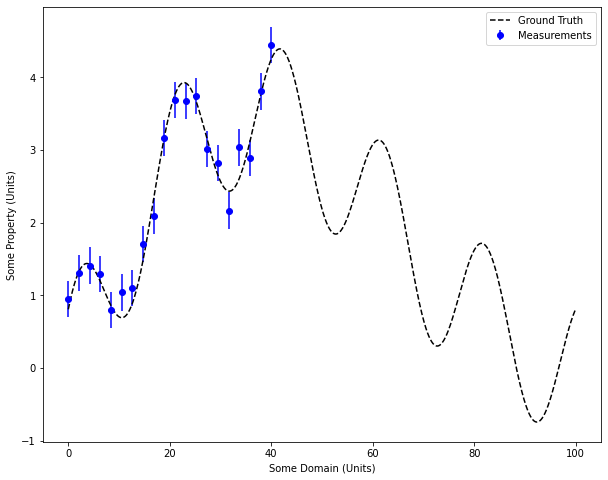

In [ ]:
x_measure = np.linspace(0,40,20)
y_measure, y_err = measure(x_measure)

#Plot the measurements alongside the ground truth
plt.figure(figsize = (10,8))
plt.errorbar(x_measure, y_measure, y_err, fmt = "bo", label = "Measurements")
plt.plot(x_ground_truth,y_ground_truth, "k--", label = "Ground Truth")
plt.xlabel("Some Domain (Units)")
plt.ylabel("Some Property (Units)")
plt.legend()
plt.show()

## Let's choose a Kernel and attempt the regression

[]

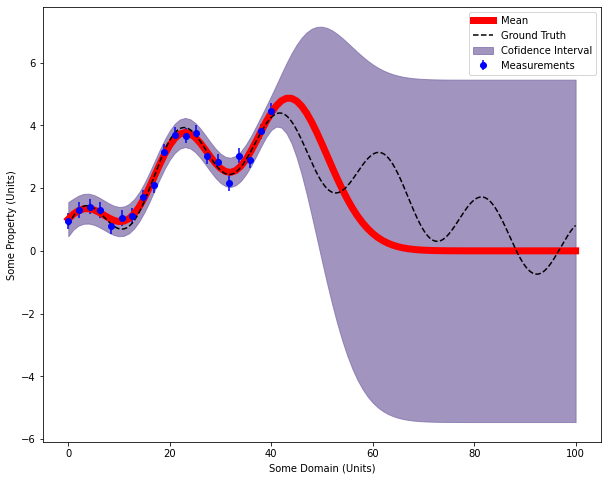

In [ ]:
K = gpflow.kernels.RBF(variance=5, lengthscales=10)

#Define the model
data = (tf.convert_to_tensor(x_measure.reshape(-1,1)),
        tf.convert_to_tensor(y_measure.reshape(-1,1)))
model = gpflow.models.GPR(data = data, 
                          kernel = K, 
                          mean_function=None, 
                          noise_variance= 1.0)

opt = gpflow.optimizers.Scipy()
opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=1000))

mean, var = model.predict_y(x_test)

#plot
plt.figure(figsize=(10,8))
plt.plot(x_test, mean, "r-", linewidth=7.0, label = 'Mean')
plt.fill_between(tf.reshape(x_test, -1), 
                 tf.reshape(mean, -1) +1.96*np.sqrt(var[:,0]), 
                 tf.reshape(mean, -1) -1.96*np.sqrt(var[:,0]), 
                 alpha=0.7, color="#7A68A6", label = 'Cofidence Interval')
plt.errorbar(x_measure, y_measure, y_err, fmt = "bo", label = "Measurements")
plt.plot(x_ground_truth,y_ground_truth, "k--", label = "Ground Truth")
plt.xlabel("Some Domain (Units)")
plt.ylabel("Some Property (Units)")
plt.legend()
plt.plot()



In [ ]:
model

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,7.70109
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,8.68127
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.04309


In [ ]:
np.sqrt(model.likelihood.variance.numpy())

0.2075918639885172

[]

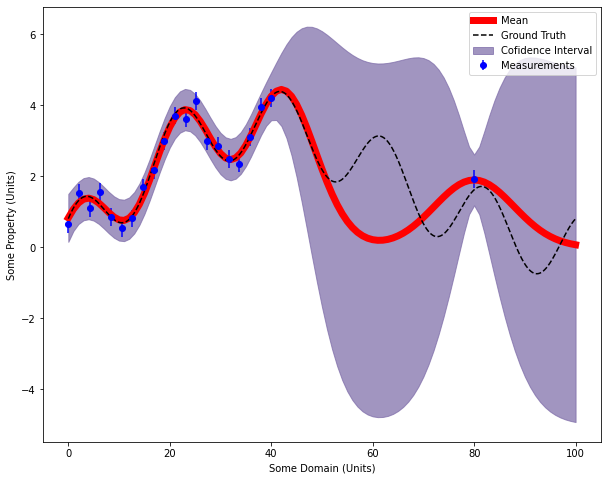

In [ ]:
x_measure = np.append(x_measure, 80.0)
y_measure, y_err = measure(x_measure)

K = gpflow.kernels.RBF(variance=5, lengthscales=10)

#Define the model
data = (tf.convert_to_tensor(x_measure.reshape(-1,1)),
        tf.convert_to_tensor(y_measure.reshape(-1,1)))
model = gpflow.models.GPR(data = data, 
                          kernel = K, 
                          mean_function=None, 
                          noise_variance= 1.0)

opt = gpflow.optimizers.Scipy()
opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=1000))

mean, var = model.predict_y(x_test)

#plot
plt.figure(figsize=(10,8))
plt.plot(x_test, mean, "r-", linewidth=7.0, label = 'Mean')
plt.fill_between(tf.reshape(x_test, -1), 
                 tf.reshape(mean, -1) +1.96*np.sqrt(var[:,0]), 
                 tf.reshape(mean, -1) -1.96*np.sqrt(var[:,0]), 
                 alpha=0.7, color="#7A68A6", label = 'Cofidence Interval')
plt.errorbar(x_measure, y_measure, y_err, fmt = "bo", label = "Measurements")
plt.plot(x_ground_truth,y_ground_truth, "k--", label = "Ground Truth")
plt.xlabel("Some Domain (Units)")
plt.ylabel("Some Property (Units)")
plt.legend()
plt.plot()

## With the noise variance too small

[]

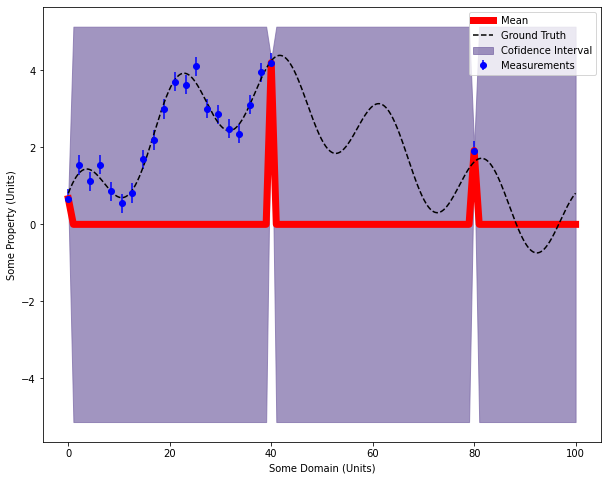

In [ ]:
K = gpflow.kernels.RBF(variance=5, lengthscales=10)

#Define the model with the likelihood variance fixed too small. 
data = (tf.convert_to_tensor(x_measure.reshape(-1,1)),
        tf.convert_to_tensor(y_measure.reshape(-1,1)))
model = gpflow.models.GPR(data = data, 
                          kernel = K, 
                          mean_function=None, 
                          noise_variance= 0.001)
gpflow.utilities.set_trainable(model.likelihood.variance, False)

opt = gpflow.optimizers.Scipy()
opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=1000))

mean, var = model.predict_y(x_test)

#plot
plt.figure(figsize=(10,8))
plt.plot(x_test, mean, "r-", linewidth=7.0, label = 'Mean')
plt.fill_between(tf.reshape(x_test, -1), 
                 tf.reshape(mean, -1) +1.96*np.sqrt(var[:,0]), 
                 tf.reshape(mean, -1) -1.96*np.sqrt(var[:,0]), 
                 alpha=0.7, color="#7A68A6", label = 'Cofidence Interval')
plt.errorbar(x_measure, y_measure, y_err, fmt = "bo", label = "Measurements")
plt.plot(x_ground_truth,y_ground_truth, "k--", label = "Ground Truth")
plt.xlabel("Some Domain (Units)")
plt.ylabel("Some Property (Units)")
plt.legend()
plt.plot()

In [ ]:
model

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,6.87139
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,3e-05
GPR.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.001


## With the noise variance too large

[]

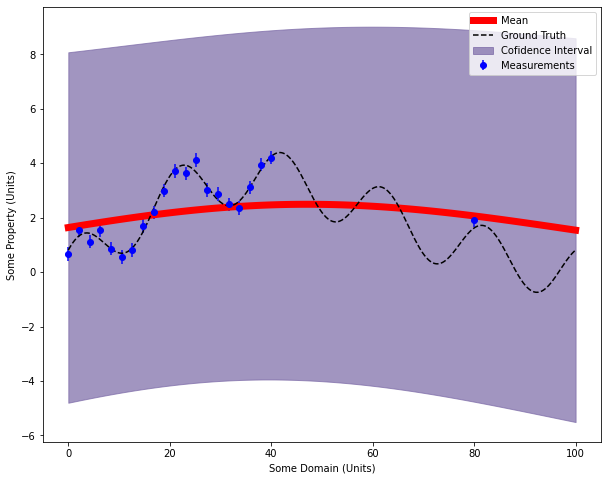

In [ ]:
K = gpflow.kernels.RBF(variance=5, lengthscales=10)

#Define the model with the likelihood variance fixed too large. 
data = (tf.convert_to_tensor(x_measure.reshape(-1,1)),
        tf.convert_to_tensor(y_measure.reshape(-1,1)))
model = gpflow.models.GPR(data = data, 
                          kernel = K, 
                          mean_function=None, 
                          noise_variance= 10)
gpflow.utilities.set_trainable(model.likelihood.variance, False)

opt = gpflow.optimizers.Scipy()
opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=1000))

mean, var = model.predict_y(x_test)

#plot
plt.figure(figsize=(10,8))
plt.plot(x_test, mean, "r-", linewidth=7.0, label = 'Mean')
plt.fill_between(tf.reshape(x_test, -1), 
                 tf.reshape(mean, -1) +1.96*np.sqrt(var[:,0]), 
                 tf.reshape(mean, -1) -1.96*np.sqrt(var[:,0]), 
                 alpha=0.7, color="#7A68A6", label = 'Cofidence Interval')
plt.errorbar(x_measure, y_measure, y_err, fmt = "bo", label = "Measurements")
plt.plot(x_ground_truth,y_ground_truth, "k--", label = "Ground Truth")
plt.xlabel("Some Domain (Units)")
plt.ylabel("Some Property (Units)")
plt.legend()
plt.plot()

## Now with Uncertainty on Individual Data Points

In [ ]:
def measure_intensity(x):
    #Find the ground truth, and add Gaussian noise (defined by mean and std)
    y_nominal = ground_truth_function(x)

    #Let's say the uncertainty depends on the value of y (like would be the case for an intensity measurement, or other Poissonian counting measurements)
    y_uncertainty = 0.25*np.sqrt(y_nominal)
    y = np.random.normal(loc= y_nominal, scale = y_uncertainty) 
    
    return y, y_uncertainty

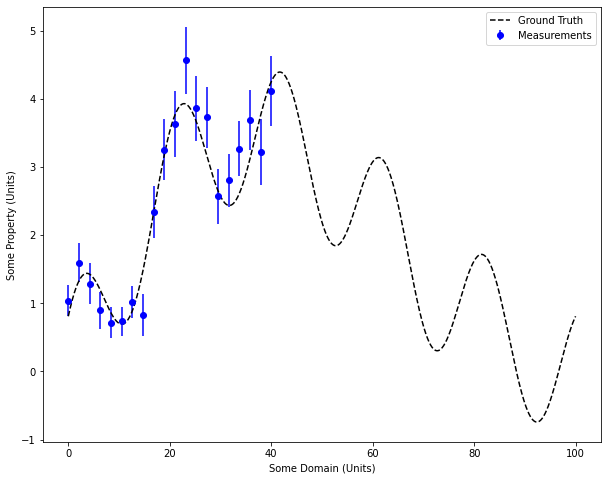

In [ ]:
x_measure = np.linspace(0,40,20)
y_measure, y_err = measure_intensity(x_measure)

#Plot the measurements alongside the ground truth
plt.figure(figsize = (10,8))
plt.errorbar(x_measure, y_measure, y_err, fmt = "bo", label = "Measurements")
plt.plot(x_ground_truth,y_ground_truth, "k--", label = "Ground Truth")
plt.xlabel("Some Domain (Units)")
plt.ylabel("Some Property (Units)")
plt.legend()
plt.show()

[]

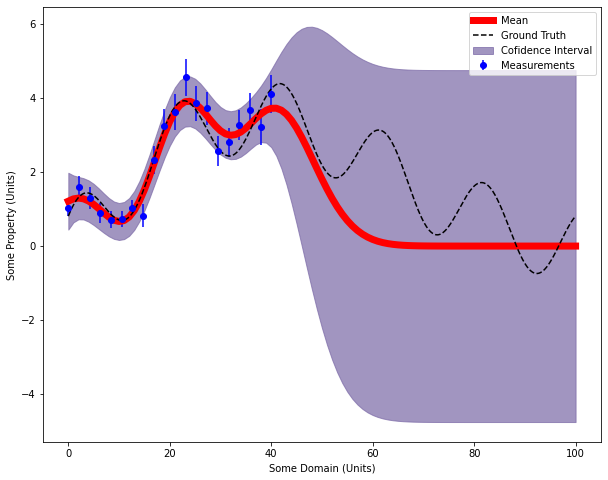

In [ ]:
K = gpflow.kernels.RBF(variance=5, lengthscales=10)

y_errs = tf.convert_to_tensor(y_err.reshape(-1,1))

#Define a custom likelihood function
class FixedVarianceOfMean(gpflow.functions.Function):
    def __init__(self, Y_err: gpflow.base.AnyNDArray):
        self.var_mean = Y_err

    def __call__(self, X: gpflow.base.TensorType) -> tf.Tensor:
        return self.var_mean


data = (tf.convert_to_tensor(x_measure.reshape(-1,1)),
        tf.convert_to_tensor(y_measure.reshape(-1,1)))
model = gpflow.models.GPR(data = data, 
                          kernel = K, 
                          mean_function=None, 
                          #noise_variance= 1.0,
                          likelihood=gpflow.likelihoods.Gaussian(variance=FixedVarianceOfMean(y_errs)))


opt = gpflow.optimizers.Scipy()
opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=1000))

mean, var = model.predict_f(x_test) #Notice this is predict_f 

#plot
plt.figure(figsize=(10,8))
plt.plot(x_test, mean, "r-", linewidth=7.0, label = 'Mean')
plt.fill_between(tf.reshape(x_test, -1), 
                 tf.reshape(mean, -1) +1.96*np.sqrt(var[:,0]), 
                 tf.reshape(mean, -1) -1.96*np.sqrt(var[:,0]), 
                 alpha=0.7, color="#7A68A6", label = 'Cofidence Interval')
plt.errorbar(x_measure, y_measure, y_err, fmt = "bo", label = "Measurements")
plt.plot(x_ground_truth,y_ground_truth, "k--", label = "Ground Truth")
plt.xlabel("Some Domain (Units)")
plt.ylabel("Some Property (Units)")
plt.legend()
plt.plot()

# Pitfalls

The default distance in most kernels is Euclidean distance. 
Some variables in Chemistry and Material Science are not Euclidean:

Consider a few points in mixture of elements A and B. Let's investigate both ends of this compostion range.  

One choice for your domain might be a ratio: A/B.

Another choice might be percent: A/(A+B). 

Let's see what these look like. 

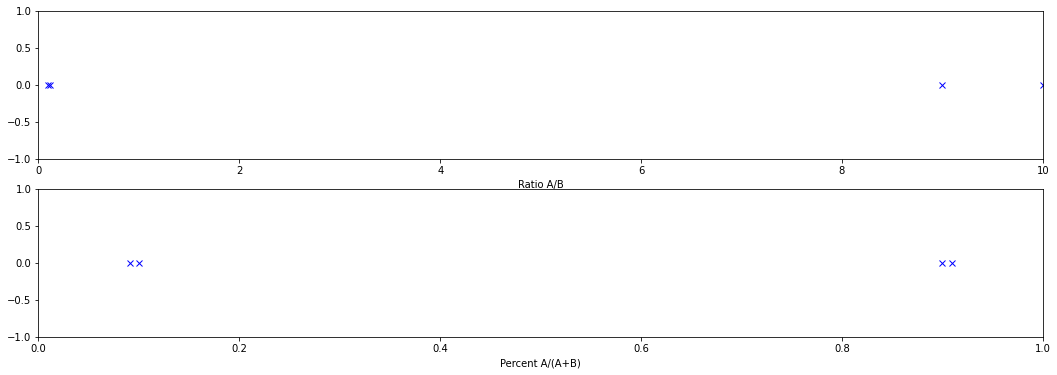

In [ ]:
A = np.array([1,1,9,10])
B = np.array([10,9,1,1])

X_ratio = A/B
X_percent = A/(A+B)

#Let's plot this on a nubmer line.
Y = np.zeros_like(A)
f, axes = plt.subplots(2, 1, figsize=(18, 6), sharex=False, sharey=True)
axes[0].plot(X_ratio, Y, "bx")
axes[0].set_xlabel('Ratio A/B')
axes[1].plot(X_percent, Y, "bx")
axes[1].set_xlabel("Percent A/(A+B)")
axes[0].set_ylim(-1,1)
axes[0].set_xlim(0,10)
axes[1].set_xlim(0,1)
plt.show()

As a ratio 1/10 and 1/9 are very close (r = 0.0111...)

Whereas 10/1 and 9/1 are very far apart (r = 1.0)

As a percent 1/11 and 1/10 have the same distance (r = 0.009090...) as,
9/10 and 10/11 (r = 0.009090) 

What this is saying by using a GP with Euclidean distance on the **ratios** is: 1/9 and 1/10 are so close together that outputs should be the same, whereas 9/1 and 10/1 are so far apart that outputs are not related.

By using a GP with Euclidean distance on the **percentages** is:
the outputs at 0.10 and 0.0̅9̅0̅9̅ should be as related to eachother as the outputs at 0.90 and 0.9̅0̅9̅0̅


In [ ]:
A1 = 1
B1 = 10

A2 = 1
B2 = 9

A3 = 9
B3 = 1

A4 = 10
B4 = 1

#as ratios 
d1 = np.abs(A1/B1 - A2/B2)
d2 = np.abs(A3/B3 - A4/B4)

print('as ratios: ', d1-d2)

#as percentages 
d3 = np.abs(A1/(A1+B1) - A2/(A2+B2))
d4 = np.abs(A3/(A3+B3) - A4/(A4+B4))

print('as percentages: ', d3-d4)

as ratios:  -0.9888888888888889
as percentages:  5.551115123125783e-17
